In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sagemaker
import boto3
from sagemaker.session import s3_input, Session

In [3]:
bucket_name = 'supraja-var-tesladataset' 
my_region = boto3.session.Session().region_name # set the region of the instance
print(my_region)

us-east-1


In [4]:
s3 = boto3.resource('s3')
try:
    if  my_region == 'us-east-1':
        s3.create_bucket(Bucket=bucket_name)
    print('S3 bucket created successfully')
except Exception as e:
    print('S3 error: ',e)

S3 bucket created successfully


In [5]:
# set an output path where the trained model will be saved
prefix = 'var-tesla-as-a-built-in-algo'
output_path ='s3://{}/{}/output'.format(bucket_name, prefix)
print(output_path)

s3://supraja-var-tesladataset/var-tesla-as-a-built-in-algo/output


In [6]:
symbols = ["TSLA","^GSPC","^DJI","^IXIC","^RUT","CL=F","^FTSE","GC=F","SI=F","^N225","JPY=X","GBPUSD=X","EURUSD=X"]
start_date = "2007-01-02"

features_close = {}

for symbol in symbols:
    features = yf.download(symbol, start=start_date)
    features_close[symbol] = features["Close"]

# Combine Close prices into single dataframe
df= pd.concat(features_close.values(), axis=1, keys=features_close.keys())

df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TSLA,^GSPC,^DJI,^IXIC,^RUT,CL=F,^FTSE,GC=F,SI=F,^N225,JPY=X,GBPUSD=X,EURUSD=X
Date,,,,,,,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,61.049999,6310.899902,635.200012,12.818000,NaN,118.830002,1.973399,1.327598
2007-01-03,NaN,1416.599976,12474.519531,2423.159912,787.419983,58.320000,6319.000000,627.099976,12.555000,NaN,119.339996,1.952210,1.317107
2007-01-04,NaN,1418.339966,12480.690430,2453.429932,789.950012,55.590000,6287.000000,623.900024,12.727000,17353.669922,118.830002,1.942993,1.309295
2007-01-05,NaN,1409.709961,12398.009766,2434.250000,775.869995,56.310001,6220.100098,604.900024,12.130000,17091.589844,118.690002,1.930800,1.298499
2007-01-08,NaN,1412.839966,12423.490234,2438.199951,776.989990,56.090000,6194.200195,607.500000,12.260000,NaN,118.690002,1.940316,1.304002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-28,266.440002,4582.229980,35459.289062,14316.660156,1981.540039,80.580002,7694.299805,1960.400024,24.370001,32759.230469,138.863998,1.279378,1.097876
2023-07-31,267.429993,4588.959961,35559.531250,14346.019531,2003.180054,81.800003,7699.399902,1970.500000,24.854000,33172.218750,140.757996,1.285397,1.102426
2023-08-01,261.070007,4576.729980,35630.679688,14283.910156,1994.170044,81.370003,7666.299805,1940.699951,24.208000,33476.578125,142.322998,1.283401,1.099759


In [7]:
new_names = {"BTC-USD" : "Bitcoin.close" , "^GSPC" : "gscp.close", "^DJI" : "dji.close","^IXIC": "ixic.close","^RUT":"rut.close",
             "CL=F" : "clf.close", "^FTSE" : "ftse.close","GC=F" : "gfc.close","SI=F" : "sif.close","^N225" : "n225.close",
             "JPY=X" : "jpy.close","GBPUSD=X" : "gbpusd.close", "EURUSD=X" : "eurusd.close"}
df = df.rename(columns=new_names)

# Print the first few rows of the renamed dataframe
print(df.tail())

                  TSLA   gscp.close     dji.close    ixic.close    rut.close  \
Date                                                                           
2023-07-28  266.440002  4582.229980  35459.289062  14316.660156  1981.540039   
2023-07-31  267.429993  4588.959961  35559.531250  14346.019531  2003.180054   
2023-08-01  261.070007  4576.729980  35630.679688  14283.910156  1994.170044   
2023-08-02  254.110001  4513.390137  35282.519531  13973.450195  1966.829956   
2023-08-03         NaN          NaN           NaN           NaN          NaN   

            clf.close   ftse.close    gfc.close  sif.close    n225.close  \
Date                                                                       
2023-07-28  80.580002  7694.299805  1960.400024  24.370001  32759.230469   
2023-07-31  81.800003  7699.399902  1970.500000  24.854000  33172.218750   
2023-08-01  81.370003  7666.299805  1940.699951  24.208000  33476.578125   
2023-08-02  79.489998  7561.600098  1937.400024  23.754000 

In [8]:
df = df.dropna(axis=0)
df.isna().sum()

TSLA            0
gscp.close      0
dji.close       0
ixic.close      0
rut.close       0
clf.close       0
ftse.close      0
gfc.close       0
sif.close       0
n225.close      0
jpy.close       0
gbpusd.close    0
eurusd.close    0
dtype: int64

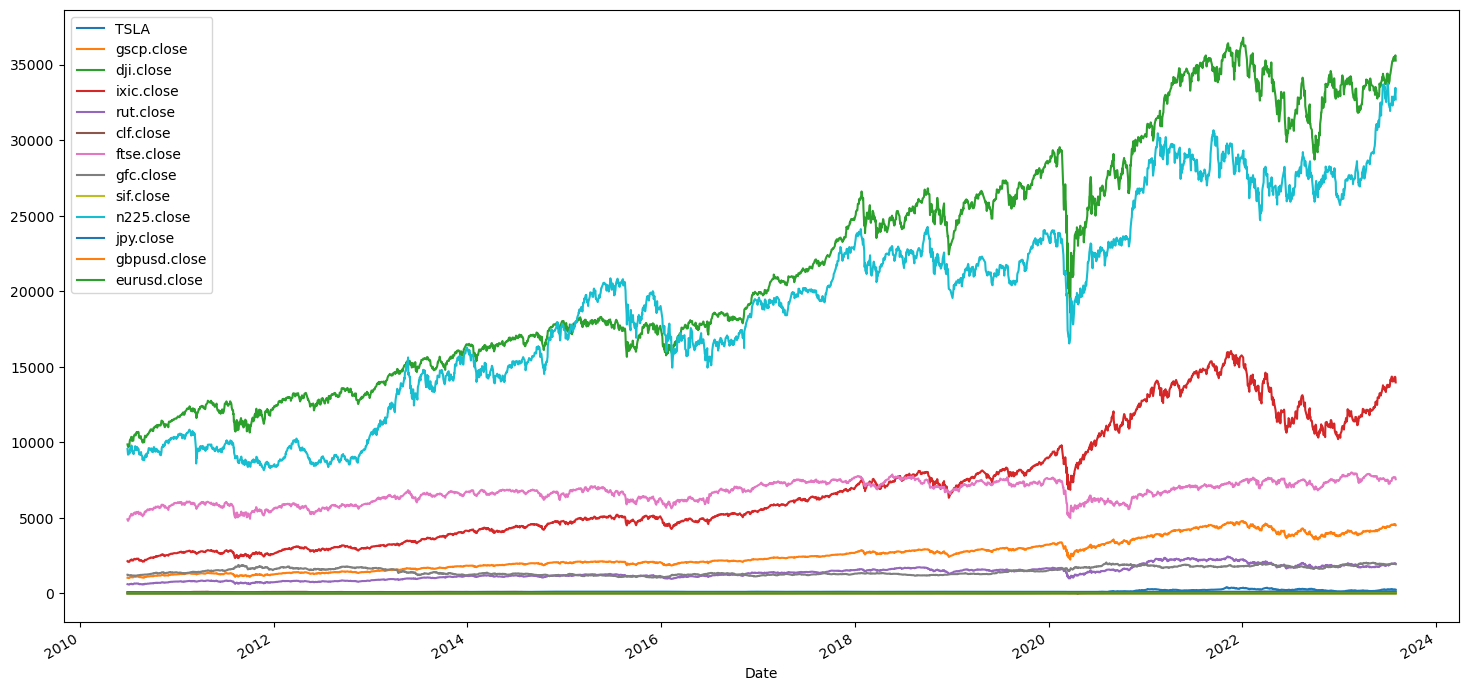

In [9]:
df_plot = pd.DataFrame(df, index=df.index)
# Plot the DataFrame
df_plot.plot(figsize=(18,9))
plt.show()

In [10]:
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


# VECTOR AUTO REGRESSION

In [11]:
macro_data = df
print(macro_data.shape) 
macro_data.head()

(3032, 13)


,TSLA,gscp.close,dji.close,ixic.close,rut.close,clf.close,ftse.close,gfc.close,sif.close,n225.close,jpy.close,gbpusd.close,eurusd.close
Date,,,,,,,,,,,,,
2010-06-29,1.592667,1041.239990,9870.299805,2135.179932,615.960022,75.940002,4914.200195,1242.000000,18.594,9570.669922,88.649002,1.505344,1.218635
2010-06-30,1.588667,1030.709961,9774.019531,2109.239990,609.489990,75.629997,4916.899902,1245.500000,18.671,9382.639648,88.430000,1.494433,1.223002
2010-07-01,1.464000,1027.369995,9732.530273,2101.360107,604.760010,72.949997,4805.799805,1206.300049,17.760,9191.599609,87.599998,1.516576,1.250750
2010-07-02,1.280000,1022.580017,9686.480469,2091.790039,598.969971,72.139999,4838.100098,1207.400024,17.698,9203.709961,87.790001,1.520496,1.257103
2010-07-06,1.074000,1028.060059,9743.620117,2093.879883,590.030029,71.980003,4965.000000,1194.800049,17.833,9338.040039,87.480003,1.514394,1.262403


In [12]:
ad_fuller_result_1 = adfuller(macro_data['TSLA'].diff()[1:])

print('realtesla')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
################################################################################
ad_fuller_result_2 = adfuller(macro_data['gscp.close'].diff()[1:])
print('realgscp')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

print('\n---------------------\n')

################################################################################
ad_fuller_result_3 = adfuller(macro_data['dji.close'].diff()[1:])
print('realdji')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')
################################################################################

ad_fuller_result_4 = adfuller(macro_data['ixic.close'].diff()[1:])
print('realixic')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_5 = adfuller(macro_data['rut.close'].diff()[1:])

print('realrut')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')
################################################################################
ad_fuller_result_6 = adfuller(macro_data['clf.close'].diff()[1:])
print('realclf')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_7 = adfuller(macro_data['ftse.close'].diff()[1:])

print('realftse')
print(f'ADF Statistic: {ad_fuller_result_7[0]}')
print(f'p-value: {ad_fuller_result_7[1]}')
################################################################################
ad_fuller_result_8 = adfuller(macro_data['gfc.close'].diff()[1:])
print('realgfc')
print(f'ADF Statistic: {ad_fuller_result_8[0]}')
print(f'p-value: {ad_fuller_result_8[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_9 = adfuller(macro_data['sif.close'].diff()[1:])

print('realsif')
print(f'ADF Statistic: {ad_fuller_result_9[0]}')
print(f'p-value: {ad_fuller_result_9[1]}')
################################################################################
ad_fuller_result_10 = adfuller(macro_data['n225.close'].diff()[1:])
print('realn225')
print(f'ADF Statistic: {ad_fuller_result_10[0]}')
print(f'p-value: {ad_fuller_result_10[1]}')

print('\n---------------------\n')
################################################################################
ad_fuller_result_11 = adfuller(macro_data['jpy.close'].diff()[1:])

print('realjpy')
print(f'ADF Statistic: {ad_fuller_result_11[0]}')
print(f'p-value: {ad_fuller_result_11[1]}')
################################################################################
ad_fuller_result_12 = adfuller(macro_data['gbpusd.close'].diff()[1:])
print('realgbpusd')
print(f'ADF Statistic: {ad_fuller_result_12[0]}')
print(f'p-value: {ad_fuller_result_12[1]}')

print('\n---------------------\n')
################################################################################ 	eurusd.close
ad_fuller_result_13 = adfuller(macro_data['eurusd.close'].diff()[1:])
print('realeurusd')
print(f'ADF Statistic: {ad_fuller_result_13[0]}')
print(f'p-value: {ad_fuller_result_13[1]}')


realtesla
ADF Statistic: -10.722312445486658
p-value: 3.128142319409482e-19
realgscp
ADF Statistic: -11.938386278217061
p-value: 4.60453425556275e-22

---------------------

realdji
ADF Statistic: -12.185538419437336
p-value: 1.3213782184639498e-22
realixic
ADF Statistic: -11.728054989041015
p-value: 1.3625149150013814e-21

---------------------

realrut
ADF Statistic: -16.131372930570297
p-value: 4.7814072616395977e-29
realclf
ADF Statistic: -45.43099545179618
p-value: 0.0

---------------------

realftse
ADF Statistic: -54.3224845619016
p-value: 0.0
realgfc
ADF Statistic: -14.86723815087171
p-value: 1.6842258801633794e-27

---------------------

realsif
ADF Statistic: -28.18614829487685
p-value: 0.0
realn225
ADF Statistic: -22.17445659934371
p-value: 0.0

---------------------

realjpy
ADF Statistic: -56.50915049934218
p-value: 0.0
realgbpusd
ADF Statistic: -54.514108416799345
p-value: 0.0

---------------------

realeurusd
ADF Statistic: -57.308562155720836
p-value: 0.0


In [13]:
df.columns

Index(['TSLA', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close',
       'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close',
       'jpy.close', 'gbpusd.close', 'eurusd.close'],
      dtype='object')

In [14]:
macro_data = macro_data[['TSLA','gscp.close','dji.close', 'ixic.close', 'rut.close',
       'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close',
       'jpy.close', 'gbpusd.close', 'eurusd.close']]
print(macro_data.shape)

(3032, 13)


In [15]:
train_df=macro_data[:-30]
test_df=macro_data[-30:]

In [16]:
import os
train_csv = train_df.to_csv('tesla-var-train.csv')
test_csv = test_df.to_csv('tesla-var-test.csv')

In [17]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'train/tesla-var-train.csv')).upload_file('tesla-var-train.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [18]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'test/tesla-var-test.csv')).upload_file('tesla-var-test.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [19]:
print(test_df.shape)

(30, 13)


In [20]:
model = VAR(train_df.diff()[1:])

In [21]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        32.38       32.41   1.155e+14       32.39
1        31.69      32.06*   5.816e+13      31.83*
2       31.63*       32.33  5.441e+13*       31.88
3        31.63       32.68   5.461e+13       32.01
4        31.64       33.02   5.487e+13       32.13
5        31.68       33.40   5.706e+13       32.30
6        31.69       33.76   5.800e+13       32.43
7        31.72       34.12   5.943e+13       32.58
8        31.73       34.48   6.017e+13       32.72
9        31.74       34.83   6.106e+13       32.85
10       31.77       35.20   6.301e+13       33.01
11       31.81       35.58   6.538e+13       33.17
12       31.84       35.95   6.726e+13       33.32
13       31.87       36.32   6.962e+13       33.47
14       31.89       36.68   7.066e+13       33.61
15       31.91       37.04   7.270e+13       33.76
16       31.95       37.42   7.

In [22]:
var_model = VARMAX(train_df, order=(1,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                                                                         Statespace Model Results                                                                                                         
Dep. Variable:     ['TSLA', 'gscp.close', 'dji.close', 'ixic.close', 'rut.close', 'clf.close', 'ftse.close', 'gfc.close', 'sif.close', 'n225.close', 'jpy.close', 'gbpusd.close', 'eurusd.close']   No. Observations:                 3002
Model:                                                                                                                                                                                     VAR(1)   Log Likelihood             -247480.609
                                                                                                                                                                                      + intercept   AIC                         495507.218
Date:                                                       

In [23]:
n_forecast = 30
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [24]:
predictions.columns=['tesla_predicted','gscp_predicted','dji_predicted', 'ixic_predicted', 'rut_predicted',
       'clf_predicted', 'ftse_predicted', 'gfc_predicted', 'sif_predicted', 'n225_predicted',
       'jpy_predicted', 'gbpusd_predicted', 'eurusd_predicted']
predictions

,tesla_predicted,gscp_predicted,dji_predicted,ixic_predicted,rut_predicted,clf_predicted,ftse_predicted,gfc_predicted,sif_predicted,n225_predicted,jpy_predicted,gbpusd_predicted,eurusd_predicted
3002,283.510238,4790.227598,37433.837993,14958.453120,2128.555052,61.071008,7932.635292,1809.713467,19.724805,33574.241251,146.425257,4.455985,2.630418
3003,276.625853,4808.832158,37772.929917,15006.275615,2173.649038,52.668288,7912.175677,1732.432200,16.082054,32677.130368,146.959802,4.299216,1.924147
3004,258.468361,4690.389747,37045.756669,14589.992419,2138.712840,47.487934,7803.037520,1697.499328,13.871511,31606.796877,145.656815,4.048045,1.608351
3005,236.921724,4520.208779,35902.229229,14001.940111,2072.507903,44.512148,7662.907088,1680.600648,12.799051,30498.674499,143.467279,3.840840,1.518251
3006,215.559532,4338.016268,34647.952101,13376.227228,1997.854295,43.030696,7520.634129,1670.952133,12.489901,29422.557630,140.893010,3.655799,1.518394
3007,195.853178,4161.292311,33418.993985,12770.928851,1924.877862,42.565349,7388.866278,1663.842893,12.645442,28410.707272,138.195969,3.482834,1.547609
3008,178.276932,3996.992513,32270.803100,12208.570346,1857.650588,42.791981,7272.134252,1657.337268,13.062844,27475.788184,135.515311,3.320081,1.580980
3009,162.856547,3847.225712,31221.415867,11695.560842,1797.428789,43.487546,7171.113899,1650.734435,13.614774,26620.501933,132.925940,3.167980,1.609465
3010,149.434584,3711.963577,30272.165278,11231.365001,1744.214417,44.495849,7084.793621,1643.857757,14.224842,25842.662376,130.467999,3.027067,1.630612
3011,137.794058,3590.310936,29417.455855,10812.736103,1697.496756,45.705684,7011.542924,1636.734915,14.848518,25137.840470,128.162049,2.897426,1.644507


In [25]:
output= predictions.to_csv('tesla-var-output.csv')

In [26]:
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'output/tesla-var-output.csv')).upload_file('tesla-var-output.csv')
s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name, prefix), content_type='csv')

In [27]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 
from statistics import mean

#predictions['apple_predicted']
predictions.index = test_df.index


In [29]:
rmse_apple = math.sqrt(mean_squared_error(predictions['tesla_predicted'],test_df['TSLA']))
mape = np.mean(np.abs((test_df['TSLA'] - predictions['tesla_predicted']) / test_df['TSLA'])) * 100
mae = np.mean(np.abs(test_df['TSLA'] - predictions['tesla_predicted']))

# print the metrics
print("RMSE: ", rmse_apple)
print("MAPE: ", mape) #in %
print("MAE: ", mae)

RMSE:  157.35545128851157
MAPE:  52.748193344504024
MAE:  142.07214964032053


In [30]:
test_df['TSLA'].mean()

267.22666625976564